<a href="https://colab.research.google.com/github/smit-collab/Board-games-prediction/blob/master/Board_Game_Review_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# libraries
import sys
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from sklearn.model_selection import train_test_split

In [0]:
# loading the data in pandas dataframe
games = pd.read_csv('games.csv')

# **Exploring the Data**

In [87]:
# printing all the columns
print(games.columns)
print(games.shape)# 20 cols and 81312 rows ie games

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


Checking for the null values

In [88]:
games.isnull().sum()

id                       0
type                     0
name                    41
yearpublished            3
minplayers               3
maxplayers               3
playingtime              3
minplaytime              3
maxplaytime              3
minage                   3
users_rated              0
average_rating           0
bayes_average_rating     0
total_owners             0
total_traders            0
total_wanters            0
total_wishers            0
total_comments           0
total_weights            0
average_weight           0
dtype: int64

In [89]:
# printing first few values
print(games.head(5))

       id       type  ... total_weights  average_weight
0   12333  boardgame  ...          2562          3.4785
1  120677  boardgame  ...          1423          3.8939
2  102794  boardgame  ...           777          3.7761
3   25613  boardgame  ...          1642          4.1590
4    3076  boardgame  ...          5213          3.2943

[5 rows x 20 columns]


higher the average_weight means more the complex game is.
Average_rating will  be predicted on the basis of other variables 



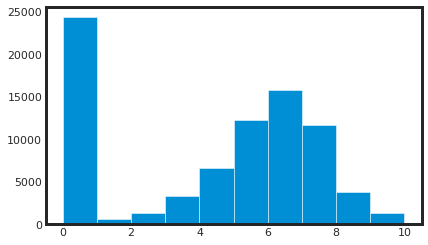

In [90]:
# making a histogram for the average rating 
plt.hist(games['average_rating'])
plt.show()

Above histogram shows that we have around 24000 zero average ratings which is a lot. and some ratings are skewed right having around 6 as avg rating.

0 rating meaning that game was never played.

In [91]:
# checking all the games with zero scores
print(games[games['average_rating']==0]) #so total 24380 game with 0 as a avg rating

           id                type  ... total_weights  average_weight
13048     318           boardgame  ...             0             0.0
13068     579           boardgame  ...             0             0.0
13114     894           boardgame  ...             0             0.0
13116     897           boardgame  ...             0             0.0
13124     946           boardgame  ...             0             0.0
...       ...                 ...  ...           ...             ...
81307  184441  boardgameexpansion  ...             0             0.0
81308  184442           boardgame  ...             0             0.0
81309  184443           boardgame  ...             0             0.0
81310  184449           boardgame  ...             0             0.0
81311  184451           boardgame  ...             0             0.0

[24380 rows x 20 columns]


In [92]:
# just getting the 1st game with 9 avg rating to see more detail
print(games[games['average_rating']==0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object


So such as we can see that for example in the game with id 318 the game itself has never been published so it has no average rating.

Now we need to remove all the rows without user reviews.

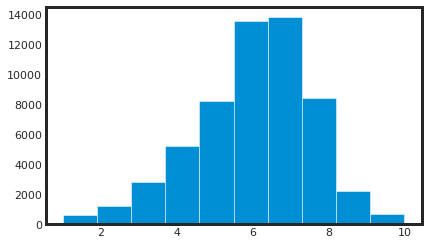

In [93]:
#get the games where users rated.
games = games[games['users_rated']>0] 

# remove the rows with missing values
games = games.dropna(axis=0)

# now again plotting the hist
plt.hist(games['average_rating'])
plt.show()

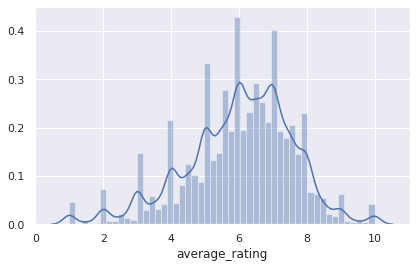

In [94]:
# viualizing more properly
import seaborn as sns
sns.set(color_codes="True")
sns.distplot(games['average_rating'])

We can clearly see from the visualizations of the average rating that most of the rating lies around 6.

In [95]:
# we can check this by calculating average and sd of the average_rating
standard_deviation = games['average_rating'].std()
average = games['average_rating'].mean()

print("Standard Deviation : ",standard_deviation)
print("Average : ",average)


Standard Deviation :  1.5788299348332662
Average :  6.016112849333889


So now we have games where users have rated it.

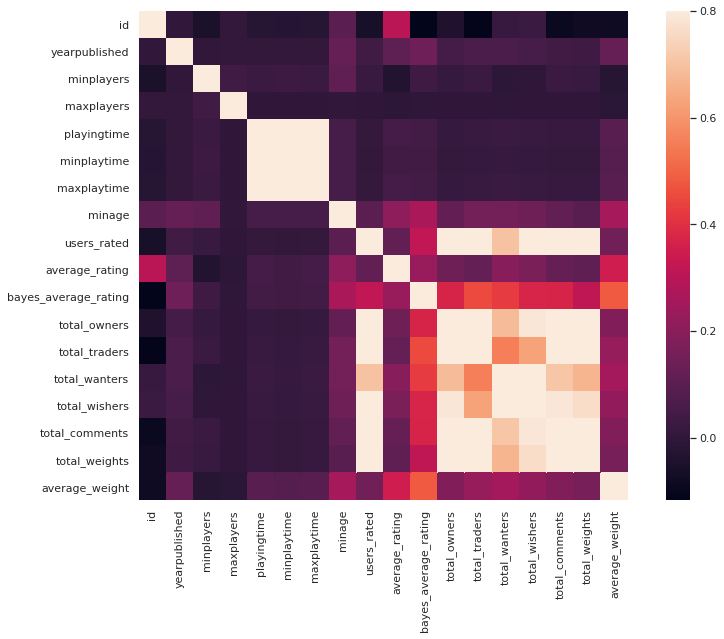

In [96]:
# making a correlation matrix
cor_mat = games.corr()
figure = plt.figure(figsize=(12,9))
sns.heatmap(cor_mat,vmax=.8,square=True) 

So we can observe some basic things like id has some correlation with average rating. 
Also average rating and average weight are also correlated.
Also min age is correlated with average rating.

so some variables like base average rating ,type,name,id as they dont give useful info about the game. but they are correlated so it will somewhat affect the results of the algorithm.

In [97]:
# checking the correlation values
correl = games.corr()
correl['average_rating']

id                      0.304201
yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64

# **Data pre-processing**

bayes_average_rating is just based on the average_rating so it dosen't give that much info
and average_rating needs to be removed as we don't want to predict the data that is in our training set.

In [0]:
# getting all the columns from the data frame.
cols = games.columns.tolist()

# removing the cols we don't need.
cols = [c for c in cols if c not in ['bayes_average_rating','average_rating','type','name','id','yearpublished']]

# getting the target var which needs to be predicted.
target = "average_rating"

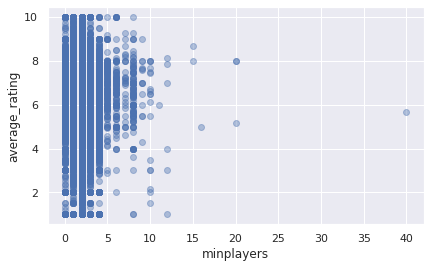

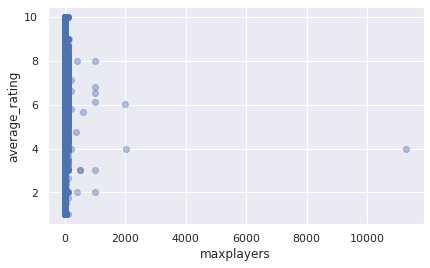

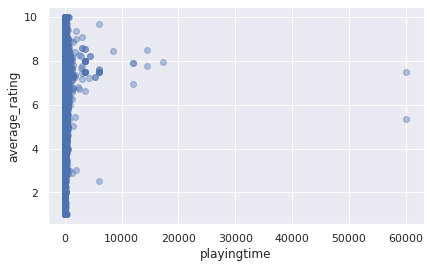

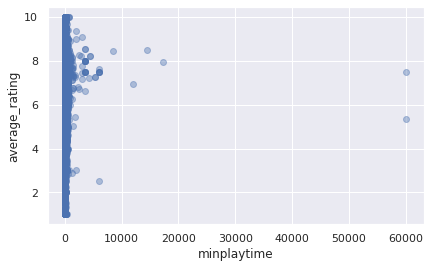

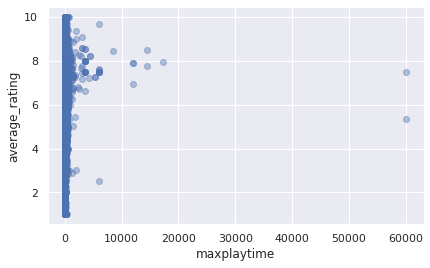

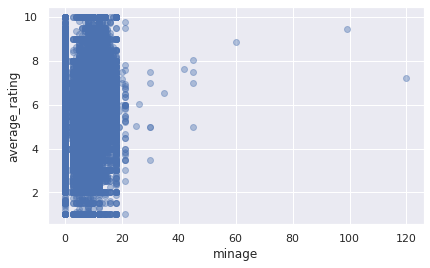

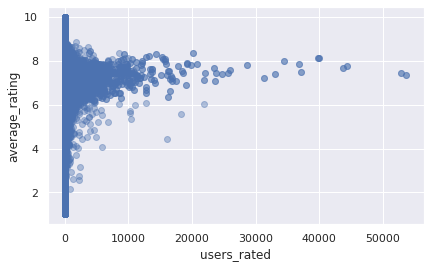

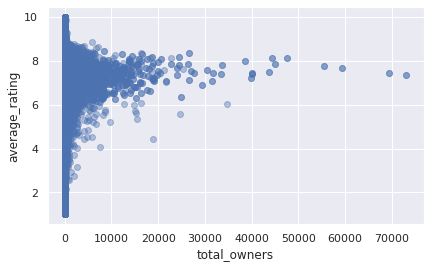

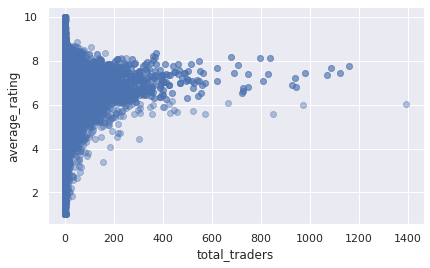

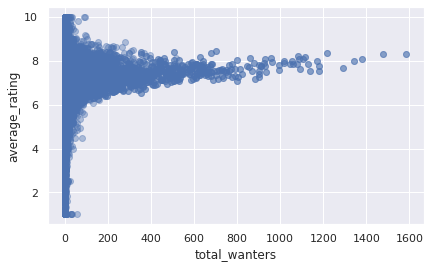

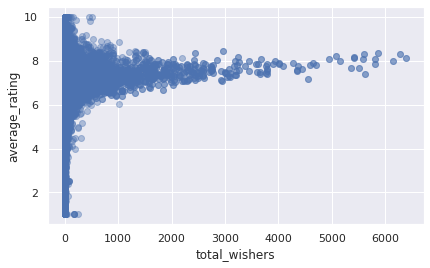

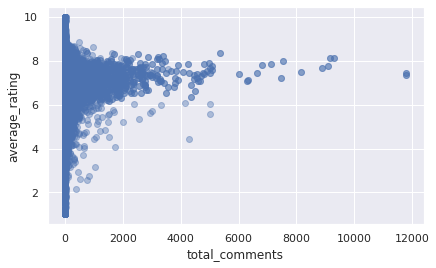

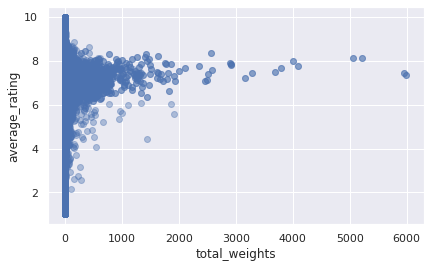

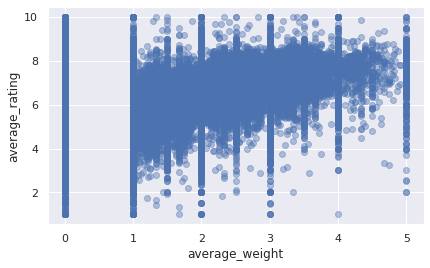

In [99]:
for c in cols:
  plt.scatter(games[c],games[target],alpha=0.4)
  plt.xlabel(c)
  plt.ylabel(target)
  plt.show()

We can clearly observe that most of the plots don't relate correlate linearly.

# **Data Preparation and Model Training**

In [100]:
# splitting the datasets and generate train and test data sets.
from sklearn.model_selection import train_test_split  

# get train data set. 
train = games.sample(frac=0.8,random_state=1)

#20% for testing dataset.
#so selecting anything not in the training set and put it in test set
test = games.loc[~games.index.isin(train.index)]

print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


**1.) Linear Regression**

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error #will be used to decide accuracy of model

linearReg = LinearRegression()

# fit the model to the training data or fit the data
linearReg.fit(train[cols],train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
# generate predictions for test set
predicitions_using_linear = linearReg.predict(test[cols])

# computing error between test predictions and actual values
mean_squared_error(predicitions_using_linear,test[target])

2.088312734369357

So using Linear Regression we got MSE 2.08 which is not the best as the data is fairly complex so the linear model won't fit it perfectly.

**2.) Random Forest**

In [103]:
from sklearn.ensemble import RandomForestRegressor #decision tree based model , non-linear

randForReg = RandomForestRegressor(n_estimators = 100 , min_samples_leaf=10,random_state=1)

# fit to the data
randForReg.fit(train[cols],train[target])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [104]:
# make predictions
predicitions_using_random = randForReg.predict(test[cols])

# compute the error
mean_squared_error(predicitions_using_random,test[target])

1.5689077717887692

We can clearly see that 1.56 is better than the linear regression. So non linear model is achiving better result than the linear model.

In [105]:
# checking rating for individual case instead of the whole data set.
print(test[cols].iloc[0])


minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64


In [108]:
# making prediction for that individual case i.e for game published in 2011 and total of 15709 users have rated that game.
rating_linear_regression = linearReg.predict(test[cols].iloc[0].values.reshape(1,-1))
rating_random_forest = randForReg.predict(test[cols].iloc[0].values.reshape(1,-1))

print("Predicted rating using Linear Regression : ",rating_linear_regression)
print("Predicted rating using Random Forest :",rating_random_forest)

# print actual values
print("\nActual rating value : ",test[target].iloc[0])



Predicted rating using Linear Regression :  [8.10709889]
Predicted rating using Random Forest : [8.12876093]

Actual rating value :  8.07933


We can see that for that individual case Linear model performed better compared to the random forest model.

In [109]:

# generic function to get the predictions for the model
def get_predictions(get_model):
  return pd.DataFrame({'Predictions':get_model}).head(5)


# printing all the values
print("Predictions of first 5 games using Linear regression model : ")
print(get_predictions(predicitions_using_linear))
print("\n")
print("Predictions of first 5 games using Random Forest model : ")
print(get_predictions(predicitions_using_random))



Predictions of first 5 games using Linear regression model : 
   Predictions
0     8.107099
1     9.214802
2     8.619089
3     7.661229
4     9.672846


Predictions of first 5 games using Random Forest model : 
   Predictions
0     8.128761
1     8.121067
2     7.869606
3     7.664976
4     7.908122
